In [2]:
# 경고(warning) 비표시
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('집계구_변수개수_가중치대입(각).csv', encoding='euc-kr')
df2 = df.iloc[:, 2:]
df2

# df2 = df[['area', 'value', 'density', 'workman', 'marketNum', 'restaurant', 'distan', 'riverNum','parkNum', 'waterNum']]
df2 = df[['density','distan']]
df2 = MinMaxScaler().fit_transform(df2)
df2 = pd.DataFrame(df2, columns=['density', 'distan'])
# df2 = pd.DataFrame(df2, columns=['area', 'value', 'density', 'workman', 'marketNum', 'restaurant', 'distan','riverNum', 'parkNum', 'waterNum'])
df2.isnull().sum()
df2

,density,distan
0,0.007117,0.000813
1,0.249110,0.001010
2,0.007117,0.000679
3,0.007117,0.000492
4,0.017794,0.000724
...,...,...
778,0.227758,0.000208
779,0.199288,0.000803
780,0.067616,0.000652
781,0.220641,0.000736


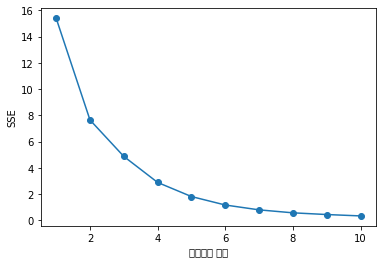

In [50]:
def elbow(x):
    sse = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i,random_state=0, init='k-means++').fit(x)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show()

elbow(df2)

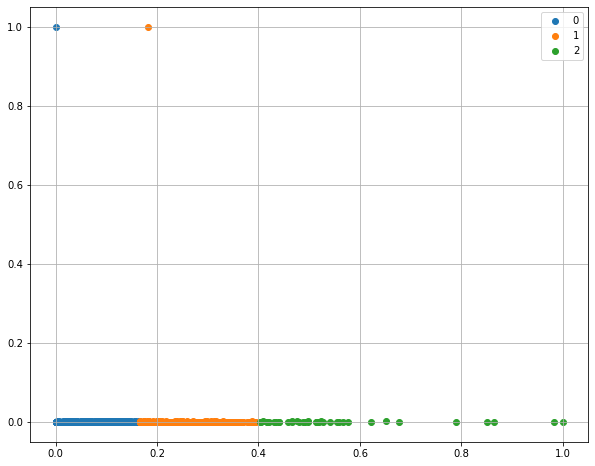

In [6]:
kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++').fit(df2)

df2['cluster'] = kmeans.labels_
final_centroid = kmeans.cluster_centers_

is_cluster = df2['cluster'] == 0
is_c0 = df2[is_cluster]
is_c0

is_cluster = df2['cluster'] == 1
is_c1 = df2[is_cluster]
is_c1

is_cluster = df2['cluster'] == 2
is_c2 = df2[is_cluster]
is_c2

plt.figure(figsize=(10, 8))
plt.scatter(is_c0['density'], is_c0['distan'], label='0')
plt.scatter(is_c1['density'], is_c1['distan'], label='1')
plt.scatter(is_c2['density'], is_c2['distan'], label='2')
plt.legend()
plt.grid()
plt.show()

[0 1 2]


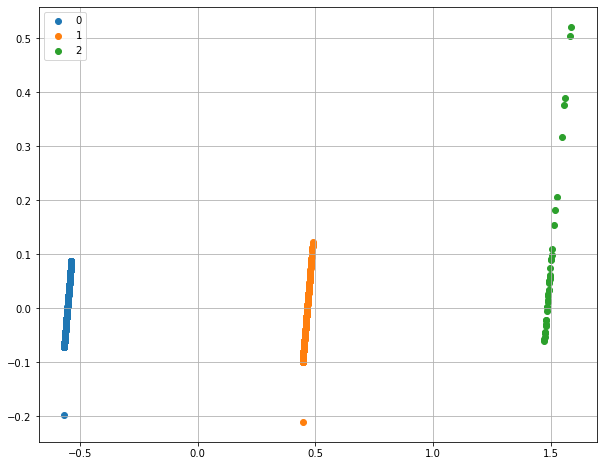

396 349 38


In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# kmeans = KMeans(n_clusters=3,random_state=0, max_iter=10).fit(df2)
kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++').fit(df2)

df2['cluster'] = kmeans.labels_
final_centroid = kmeans.cluster_centers_
df2

pca = PCA(n_components=2)
X_p = pca.fit_transform(df2)

principalDf = pd.DataFrame(data=X_p, columns = ['PC1','PC2'])
# 주성분으로 이루어진 데이터 프레임 구성
principalDf

principalDf['cluster'] = df2['cluster']
print(principalDf['cluster'].unique())

is_cluster = principalDf['cluster'] == 0
is_c0 = principalDf[is_cluster]
is_c0

is_cluster = principalDf['cluster'] == 1
is_c1 = principalDf[is_cluster]
is_c1

is_cluster = principalDf['cluster'] == 2
is_c2 = principalDf[is_cluster]
is_c2

plt.figure(figsize=(10, 8))
plt.scatter(is_c0['PC1'], is_c0['PC2'], label='0')
plt.scatter(is_c1['PC1'], is_c1['PC2'], label='1')
plt.scatter(is_c2['PC1'], is_c2['PC2'], label='2')
plt.legend()
plt.grid()
plt.show()

print(len(is_c0), len(is_c1), len(is_c2))

In [7]:
rank = df[['area', 'value', 'density', 'workman', 'marketNum', 'restaurant', 'distan', 'riverNum','parkNum', 'waterNum']]
rank = MinMaxScaler().fit_transform(rank)
rank = pd.DataFrame(rank, columns=['area', 'value', 'density', 'workman', 'marketNum', 'restaurant', 'distan','riverNum', 'parkNum', 'waterNum'])
rank['cluster'] =  df2['cluster']

group = rank.groupby(rank['cluster'])
group.mean().rank(method='max', ascending=False)

,area,value,density,workman,marketNum,restaurant,distan,riverNum,parkNum,waterNum
cluster,,,,,,,,,,
0,1.0,3.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
1,2.0,1.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,3.0
2,3.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [54]:
rank.to_csv('군집결과.csv',  encoding='euc-kr')

In [55]:
df['cluster'] = df2['cluster']
df.to_csv('군집결과_정규화X.csv',  encoding='euc-kr')